In [1]:
# Load the Packages

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, sigmoid, relu

2023-06-16 15:07:20.139159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Softmax Function

A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector $\mathbf{z}$ is generated by a linear function which is fed into a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.
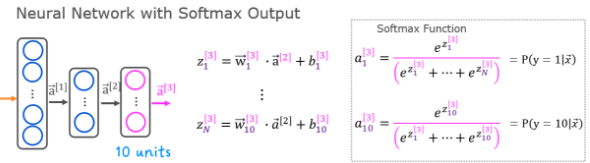

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer. 

In [2]:
def my_softmax(z):
    """ 
    Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """  
    N = z.shape[0]
    a = np.zeros(N)
    
    # Vectorized Implementation
    sum_ez = np.sum(np.exp(z))
    
    # For Loop Implementation
    """
    sum_ez = 0
    for k in range(N):
        sum_ez += np.exp(z[k])
    """
    
    for j in range(N):
        a[j] = np.exp(z[j]) / sum_ez
    
    return a

In [3]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"TensorFlow Softmax(z): {atf}")

my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
TensorFlow Softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


2023-06-16 15:07:25.945961: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Problem Statement

In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 

## Data Set

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [4]:
def load_data():
    X = np.load("Data/X.npy")
    y = np.load("Data/y.npy")
    return X, y

In [5]:
X, y = load_data()

In [6]:
print ('The First Element of X is:\n', X[0])

The First Element of X is:
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [7]:
print ('The First Element of y is:\n', y[0])

The First Element of y is:
 [0]


In [8]:
print(f"The Shape of X: {X.shape}")
print(f"The Shape of y: {y.shape}")

The Shape of X: (5000, 400)
The Shape of y: (5000, 1)


In [9]:
print(f"Unique Classes in y: {np.unique(y)}")

Unique Classes in y: [0 1 2 3 4 5 6 7 8 9]


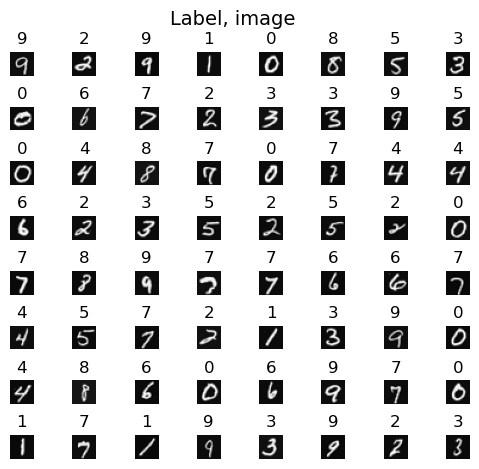

In [10]:
# Visualize the Data
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
 
# [Left, Bottom, Right, Top]
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i,ax in enumerate(axes.flat):
    # Select Random Indices
    random_index = np.random.randint(m)
    
    # Select Rows Corresponding to the Random Indices &
    # Reshape the Image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the Image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the Label above the Image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

## Model Representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs
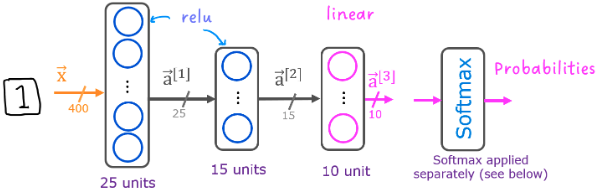

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 

## TensorFlow Model Implementation

Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below. 
>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(400,)),    #specify input shape`  
We will include that here to illuminate some model sizing.

##  Softmax Placement

As described in the lecture and the optional softmax lab, numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer should use a 'linear' activation. This is effectively no activation. 
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

In [11]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation="relu", name="L1"),
        Dense(15, activation="relu", name="L2"),
        Dense(10, activation="linear", name="L3"),
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [13]:
layer1, layer2, layer3 = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 Shape = {W1.shape}, b1 Shape = {b1.shape}")
print(f"W2 Shape = {W2.shape}, b2 Shape = {b2.shape}")
print(f"W3 Shape = {W3.shape}, b3 Shape = {b3.shape}")

W1 Shape = (400, 25), b1 Shape = (25,)
W2 Shape = (25, 15), b2 Shape = (15,)
W3 Shape = (15, 10), b3 Shape = (10,)


The following code:
* defines a loss function, `SparseCategoricalCrossentropy` and indicates the softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.

In [14]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - 1s 1ms/step - loss: 1.5738
Epoch 2/40
157/157 [==============================] - 0s 998us/step - loss: 0.6002
Epoch 3/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3817
Epoch 4/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3167
Epoch 5/40
157/157 [==============================] 

#### Epochs and Batches

In the `compile` statement above, the number of `epochs` was set to 100. This specifies that the entire data set should be applied during training 100 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/100
157/157 [==============================] - 0s 1ms/step - loss: 2.2770
```
The first line, `Epoch 1/100`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 5000 examples in our data set or roughly 157 batches. The notation on the 2nd line `157/157 [====` is describing which batch has been executed.

#### Loss  (Cost)

In course 1, we learned to track the progress of gradient descent by monitoring the cost. Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as `loss`. Above, you saw the loss displayed each epoch as `model.fit` was executing. The [.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method returns a variety of metrics including the loss. This is captured in the `history` variable above. This can be used to examine the loss in a plot as shown below.

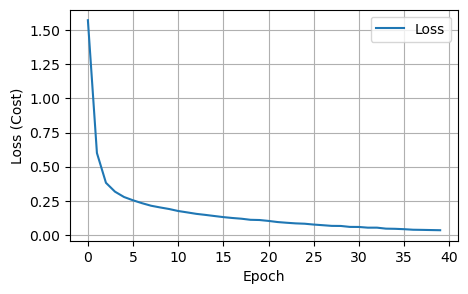

In [15]:
fig, ax = plt.subplots(1,1,figsize=(5,3))

ax.plot(history.history["loss"], label="Loss")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (Cost)')
ax.legend()
ax.grid(True)
plt.show()

## Prediction

To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a two.

In [16]:
image_of_two = X[1015]

# Prediction
prediction = model.predict(image_of_two.reshape(1,400))

print(f" Predicting a Two: \n{prediction}")
print(f" Largest Prediction Index: {np.argmax(prediction)}")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 53ms/step
 Predicting a Two: 
[[-10.254939    4.029182    5.8047934   2.6577222  -5.3218365  -6.277398
   -6.596547    2.618605   -5.610436   -8.607729 ]]
 Largest Prediction Index: 2


The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [17]:
prediction_p = tf.nn.softmax(prediction)

print(f" Predicting a Two (Probability Vector): \n{prediction_p}")
print(f"Total of Predictions: {np.sum(prediction_p):0.3f}")

 Predicting a Two (Probability Vector): 
[[8.4556149e-08 1.3510150e-01 7.9762435e-01 3.4280155e-02 1.1737199e-05
  4.5140810e-06 3.2806861e-06 3.2965098e-02 8.7948229e-06 4.3905555e-07]]
Total of Predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [18]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 [==============================] - 0s 15ms/step


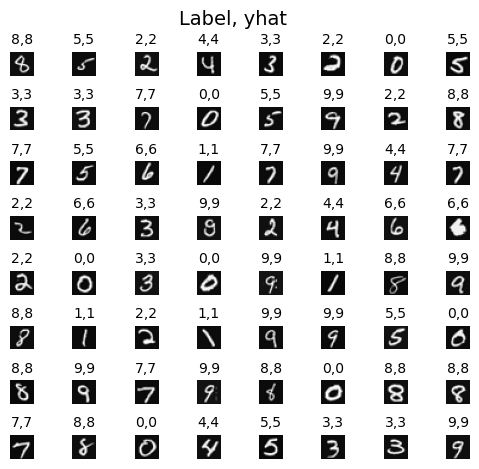

In [19]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))

# [Left, Bottom, Right, Top]
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) 


for i,ax in enumerate(axes.flat):
    # Select Random Indices
    random_index = np.random.randint(m)
    
    # Select Rows Corresponding to the Random Indices &
    # Reshape the Image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the Image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict Using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the Label above the Image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()